##1. Import the necessary packages to read in the data, plot, and create a linear regression model

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## 2. Read in the hanford.csv file 

In [4]:
df = pd.read_csv("hanford.csv")

<img src="images/hanford_variables.png">

In [5]:
df.head()

,County,Exposure,Mortality
0,Umatilla,2.49,147.1
1,Morrow,2.57,130.1
2,Gilliam,3.41,129.9
3,Sherman,1.25,113.5
4,Wasco,1.62,137.5


## 3. Calculate the basic descriptive statistics on the data

In [6]:
df.describe()

,Exposure,Mortality
count,9.000000,9.000000
mean,4.617778,157.344444
std,3.491192,34.791346
min,1.250000,113.500000
25%,2.490000,130.100000
50%,3.410000,147.100000
75%,6.410000,177.900000
max,11.640000,210.300000


## 4. Calculate the coefficient of correlation (r) and generate the scatter plot. Does there seem to be a correlation worthy of investigation?

In [7]:
df.corr()

,Exposure,Mortality
Exposure,1.000000,0.926345
Mortality,0.926345,1.000000


There seems to be a highly positive correlation between both variables, as shown by the coefficient of correlation, which equals 0.92.

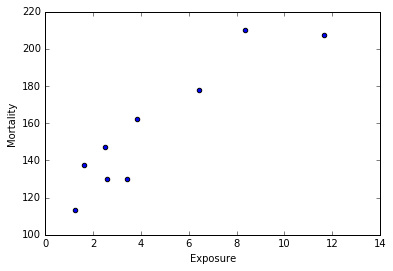

In [8]:
df.plot(kind='scatter', x='Exposure', y='Mortality')

## 5. Create a linear regression model based on the available data to predict the mortality rate given a level of exposure

In [9]:
lm = smf.ols(formula="Mortality~Exposure",data=df).fit()

In [17]:
lm.params

Intercept    114.715631
Exposure       9.231456
dtype: float64

In [18]:
intercept, slope = lm.params

In [19]:
def mortality_rate(exposure):
    for item in df['Exposure']:
        mortality = exposure * slope + intercept
    return mortality

In [20]:
mortality_rate(3)

142.4099996330761

## 6. Plot the linear regression line on the scatter plot of values. Calculate the r^2 (coefficient of determination)

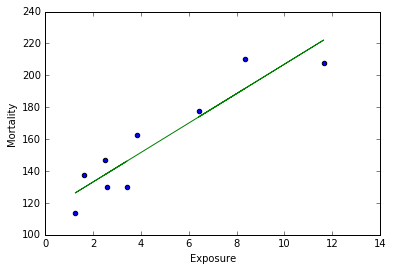

In [13]:
ax = df.plot(kind='scatter', x= 'Exposure', y='Mortality')
plt.plot(df["Exposure"],slope*df["Exposure"]+intercept,"-",color="green")

In [14]:
det_corr = (df.corr())* (df.corr())

In [15]:
det_corr

,Exposure,Mortality
Exposure,1.000000,0.858115
Mortality,0.858115,1.000000


## 7. Predict the mortality rate (Cancer per 100,000 man years) given an index of exposure = 10

In [16]:
mortality_rate(10)

207.03019352841989